In [187]:
import numpy as np
import pandas as pd
import wget
from tqdm import tqdm
import os
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
links = [
    "https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2017-01.parquet",
    "https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2017-02.parquet",
    "https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2017-03.parquet",
    "https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2017-04.parquet",
    "https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2017-05.parquet",
    "https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2017-06.parquet",
    "https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2017-07.parquet",
    "https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2017-08.parquet",
    "https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2017-09.parquet",
    "https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2017-10.parquet",
    "https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2017-11.parquet",
    "https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2017-12.parquet",
    "https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2018-01.parquet",
    "https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2018-02.parquet",
    "https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2018-03.parquet",
    "https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2018-04.parquet",
    "https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2018-05.parquet",
    "https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2018-06.parquet",
    "https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2018-07.parquet",
    "https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2018-08.parquet",
    "https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2018-09.parquet",
    "https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2018-10.parquet",
    "https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2018-11.parquet",
    "https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2018-12.parquet",
    "https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2019-01.parquet",
    "https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2019-02.parquet",
    "https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2019-03.parquet",
    "https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2019-04.parquet",
    "https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2019-05.parquet",
    "https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2019-06.parquet",
    "https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2019-07.parquet",
    "https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2019-08.parquet",
    "https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2019-09.parquet",
    "https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2019-10.parquet",
    "https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2019-11.parquet",
    "https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2019-12.parquet"
]

In [65]:
full_data = pd.DataFrame(columns=['tpep_pickup_datetime', 'passenger_count'])

for link in tqdm(links):
    data = wget.download(link, "data.parquet", bar=None)
    data = pd.read_parquet("./data.parquet", engine='pyarrow')
    data['tpep_pickup_datetime'] = data['tpep_pickup_datetime'].astype('str')
    data['tpep_pickup_datetime'] = data['tpep_pickup_datetime'].apply(lambda x: x.split(' ')[0])
    data = data[['tpep_pickup_datetime', 'passenger_count']].groupby(by = 'tpep_pickup_datetime').sum()
    data.reset_index(inplace=True)
    full_data = pd.concat([full_data, data], axis = 0)
    if(os.path.exists("./data.parquet")):
        os.remove("./data.parquet")

full_data.reset_index(inplace=True)

100%|███████████████████████████████████████████| 36/36 [07:41<00:00, 12.81s/it]


In [81]:
# Saving data to disk
full_data.to_csv("FullData.csv")

In [111]:
# Filtering data for anomalies
full_data = pd.read_csv('./FullData.csv').drop(columns = ['Unnamed: 0', 'index'])
full_data['tpep_pickup_datetime'] = pd.to_datetime(full_data['tpep_pickup_datetime'])
full_data = full_data[(full_data['tpep_pickup_datetime'] >= '2017-01-01') & (full_data['tpep_pickup_datetime'] <= '2019-12-31')]

full_data = full_data[full_data['passenger_count'] >= 1000]
full_data.sort_values(by='tpep_pickup_datetime', inplace=True)


In [114]:
full_data.to_csv("CleanData.csv")

### Data Analysis

In [124]:
full_data = pd.read_csv("./CleanData.csv")

In [125]:
full_data = full_data.drop(columns=['Unnamed: 0'])

In [127]:
full_data.head()

,tpep_pickup_datetime,passenger_count
0,2017-01-01,492666.0
1,2017-01-02,382771.0
2,2017-01-03,452785.0
3,2017-01-04,468784.0
4,2017-01-05,522893.0


In [180]:
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec']
years = ['2017', '2018', '2019']
day_names = ['Mon', 'Tue', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun']

In [131]:
full_data['year'] = full_data['tpep_pickup_datetime'].apply(lambda x: int(x.split('-')[0]))
full_data['month'] = full_data['tpep_pickup_datetime'].apply(lambda x: int(x.split('-')[1]))
full_data['date'] = full_data['tpep_pickup_datetime'].apply(lambda x: int(x.split('-')[2]))

In [176]:
full_data['weekday'] = full_data['tpep_pickup_datetime'].apply(lambda x: datetime.strptime(x, "%Y-%m-%d").date().isoweekday())


In [177]:
full_data.head()

,tpep_pickup_datetime,passenger_count,year,month,date,weekday
0,2017-01-01,492666.0,2017,1,1,7
1,2017-01-02,382771.0,2017,1,2,1
2,2017-01-03,452785.0,2017,1,3,2
3,2017-01-04,468784.0,2017,1,4,3
4,2017-01-05,522893.0,2017,1,5,4


In [182]:
months = full_data['month'].unique()
years = full_data['year'].unique()
dates = full_data['date'].unique()
weekdays = full_data['weekday'].unique()

In [194]:
# Aggregate by year

yearly_counts = full_data[['year', 'passenger_count']].groupby(by = ['year']).sum().sort_values(by = 'year', ascending=True)
yearly_counts.reset_index(inplace=True)

monthly_counts = full_data[['month', 'passenger_count']].groupby(by = ['month']).sum().sort_values(by = 'month', ascending=True)
monthly_counts.reset_index(inplace=True)

daily_counts = full_data[['date', 'passenger_count']].groupby(by = ['date']).sum().sort_values(by = 'date', ascending=True)
daily_counts.reset_index(inplace=True)

weekday_counts = full_data[['weekday', 'passenger_count']].groupby(by = ['weekday']).sum().sort_values(by = 'weekday', ascending=True)
weekday_counts.reset_index(inplace=True)


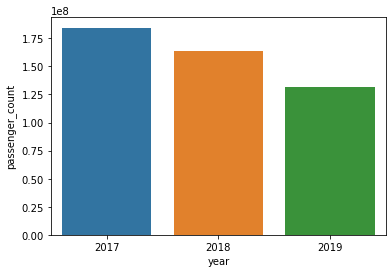

In [208]:
sns.barplot(data=yearly_counts, x="year", y="passenger_count")
plt.show()

In [202]:
monthly_counts['month'] = monthly_counts['month'].apply(lambda x: month_names[x - 1])
weekday_counts['weekday'] = weekday_counts['weekday'].apply(lambda x: day_names[x - 1])

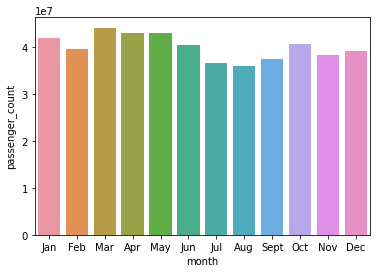

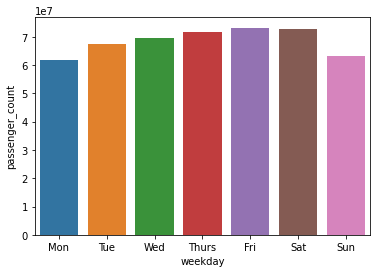

In [209]:
sns.barplot(data=monthly_counts, x="month", y="passenger_count")
plt.show()
sns.barplot(data=weekday_counts, x="weekday", y="passenger_count")
plt.show()

In [220]:
full_data['month_date'] = full_data[['month', 'date']].apply(
                                                      lambda x: month_names[x[0] - 1] + "-" + str(x[1]), axis = 1)

In [223]:
date_counts = full_data[['month_date', 'passenger_count']].groupby(by = ['month_date']).sum()
date_counts.reset_index(inplace = True)

In [226]:
date_counts.sort_values(by = 'passenger_count', ascending=True).head(10)

,month_date,passenger_count
78,Dec-25,641107.0
176,Jul-4,819967.0
79,Dec-26,917287.0
77,Dec-24,921746.0
346,Sept-2,957732.0
357,Sept-3,967124.0
177,Jul-5,995328.0
173,Jul-3,1005275.0
335,Sept-1,1018126.0
84,Dec-30,1018691.0


In [229]:
date_counts.sort_values(by = 'passenger_count', ascending=False).head(10)

,month_date,passenger_count
242,Mar-9,1582415.0
213,Mar-10,1551799.0
103,Feb-2,1550036.0
25,Apr-5,1541837.0
26,Apr-6,1532067.0
268,May-4,1531779.0
223,Mar-2,1530383.0
138,Jan-26,1526901.0
234,Mar-3,1523628.0
269,May-5,1522002.0


In [236]:
aug_data = full_data.copy()

In [243]:
labels_365 = []
labels_182 = []
labels_45 = []

i = 0
j = 0
k = 0

for n in range(len(aug_data)):
    labels_365.append((i % 365) + 1)
    labels_182.append((j % 182) + 1)
    labels_45.append((k % 45) + 1)
    i+=1
    j+=1
    k+=1
    

aug_data['labels_365'] = np.array(labels_365)
aug_data['labels_182'] = np.array(labels_182)
aug_data['labels_45'] = np.array(labels_45)
aug_data['labels_30'] = aug_data['date']

In [248]:
aug_data.to_csv("./augmented_data.csv")

### Heatmap of aic and bic scores

In [266]:
aics = np.genfromtxt("aics.csv", delimiter = ",")
scores = np.genfromtxt("scores.csv", delimiter = ",")

In [268]:
aics = aics[1:, 1:]
scores = scores[1:, 1:]

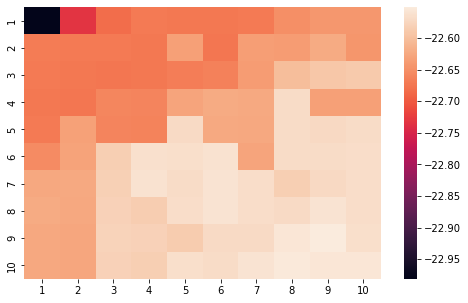

In [290]:
plt.figure(figsize = (8,5))
xticks = np.linspace(1, 10, 10).astype(int)
sns.heatmap(-aics, xticklabels= xticks, yticklabels=xticks)
plt.show()

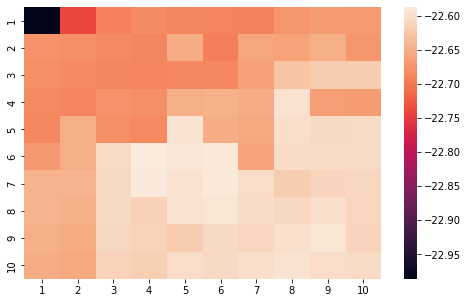

In [293]:
plt.figure(figsize = (8,5))
sns.heatmap(-scores, xticklabels= xticks, yticklabels=xticks)
plt.show()